In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
df = pd.read_csv("data.csv")

In [281]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000,4.215000e+03,4215.0,4215.0
mean,471.686572,474.615148,468.802337,471.638778,471.638778,2.607294e+05,0.0,0.0
std,250.797303,252.113341,249.418792,250.706089,250.706089,2.304953e+05,0.0,0.0
min,83.900002,84.199997,83.300003,83.900002,83.900002,0.000000e+00,0.0,0.0
25%,214.299995,216.250000,212.349998,214.349998,214.349998,1.240545e+05,0.0,0.0
50%,478.799988,481.700012,475.200012,478.700012,478.700012,1.997400e+05,0.0,0.0
75%,712.500000,715.899994,708.950012,712.049988,712.049988,3.272500e+05,0.0,0.0
max,975.000000,979.500000,958.200012,967.200012,967.200012,3.137015e+06,0.0,0.0


In [282]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2022-02-24 09:30:00+03:00,96.599998,96.750000,96.599998,96.750000,96.750000,44938,0.0,0.0
1,2022-02-24 10:30:00+03:00,97.000000,98.849998,96.699997,97.099998,97.099998,648924,0.0,0.0
2,2022-02-24 11:30:00+03:00,97.099998,97.949997,96.300003,96.400002,96.400002,772067,0.0,0.0
3,2022-02-24 12:30:00+03:00,96.400002,96.500000,96.300003,96.300003,96.300003,73087,0.0,0.0
4,2022-02-24 13:30:00+03:00,96.300003,96.300003,96.300003,96.300003,96.300003,10806,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4210,2024-02-23 13:30:00+03:00,843.000000,850.000000,840.500000,847.000000,847.000000,480130,0.0,0.0
4211,2024-02-23 14:30:00+03:00,847.500000,848.500000,841.000000,843.000000,843.000000,246652,0.0,0.0
4212,2024-02-23 15:30:00+03:00,842.500000,858.500000,840.000000,853.000000,853.000000,800435,0.0,0.0
4213,2024-02-23 16:30:00+03:00,853.000000,857.000000,850.000000,855.000000,855.000000,421211,0.0,0.0


In [283]:
df.loc[:, 'Close-Delay'] = df["Close"].shift(periods=1, axis=0)

In [284]:
df = df.drop([0], axis=0)
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Close-Delay
1,2022-02-24 10:30:00+03:00,97.000000,98.849998,96.699997,97.099998,97.099998,648924,0.0,0.0,96.750000
2,2022-02-24 11:30:00+03:00,97.099998,97.949997,96.300003,96.400002,96.400002,772067,0.0,0.0,97.099998
3,2022-02-24 12:30:00+03:00,96.400002,96.500000,96.300003,96.300003,96.300003,73087,0.0,0.0,96.400002
4,2022-02-24 13:30:00+03:00,96.300003,96.300003,96.300003,96.300003,96.300003,10806,0.0,0.0,96.300003
5,2022-02-24 14:30:00+03:00,96.300003,96.300003,96.300003,96.300003,96.300003,8382,0.0,0.0,96.300003
...,...,...,...,...,...,...,...,...,...,...
4210,2024-02-23 13:30:00+03:00,843.000000,850.000000,840.500000,847.000000,847.000000,480130,0.0,0.0,843.000000
4211,2024-02-23 14:30:00+03:00,847.500000,848.500000,841.000000,843.000000,843.000000,246652,0.0,0.0,847.000000
4212,2024-02-23 15:30:00+03:00,842.500000,858.500000,840.000000,853.000000,853.000000,800435,0.0,0.0,843.000000
4213,2024-02-23 16:30:00+03:00,853.000000,857.000000,850.000000,855.000000,855.000000,421211,0.0,0.0,853.000000


In [285]:
df = df.drop(["Datetime","Open","High","Low","Adj Close","Dividends","Stock Splits"],axis=1)

In [286]:
df.corr()["Close"].sort_values()

Volume        -0.097755
Close-Delay    0.999800
Close          1.000000
Name: Close, dtype: float64

In [287]:
df

,Close,Volume,Close-Delay
1,97.099998,648924,96.750000
2,96.400002,772067,97.099998
3,96.300003,73087,96.400002
4,96.300003,10806,96.300003
5,96.300003,8382,96.300003
...,...,...,...
4210,847.000000,480130,843.000000
4211,843.000000,246652,847.000000
4212,853.000000,800435,843.000000
4213,855.000000,421211,853.000000


In [288]:
for i in range(1,len(df["Close"])+1):
    if((df["Close"][i] - df["Close-Delay"][i]) < 0):       
        df.loc[i, 'Close-direction'] = 0
    else:
        df.loc[i, 'Close-direction'] = 1

In [289]:
df

,Close,Volume,Close-Delay,Close-direction
1,97.099998,648924,96.750000,1.0
2,96.400002,772067,97.099998,0.0
3,96.300003,73087,96.400002,0.0
4,96.300003,10806,96.300003,1.0
5,96.300003,8382,96.300003,1.0
...,...,...,...,...
4210,847.000000,480130,843.000000,1.0
4211,843.000000,246652,847.000000,0.0
4212,853.000000,800435,843.000000,1.0
4213,855.000000,421211,853.000000,1.0


In [290]:
df.loc[:, 'Close-Direction-Delay0'] = df["Close-direction"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay1'] = df["Close-Direction-Delay0"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay2'] = df["Close-Direction-Delay1"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay3'] = df["Close-Direction-Delay2"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay4'] = df["Close-Direction-Delay3"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay5'] = df["Close-Direction-Delay4"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay6'] = df["Close-Direction-Delay5"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay7'] = df["Close-Direction-Delay6"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay8'] = df["Close-Direction-Delay7"].shift(periods=1, axis=0)
df.loc[:, 'Close-Direction-Delay9'] = df["Close-Direction-Delay8"].shift(periods=1, axis=0)

In [291]:
df.head(11)

,Close,Volume,Close-Delay,Close-direction,Close-Direction-Delay0,Close-Direction-Delay1,Close-Direction-Delay2,Close-Direction-Delay3,Close-Direction-Delay4,Close-Direction-Delay5,Close-Direction-Delay6,Close-Direction-Delay7,Close-Direction-Delay8,Close-Direction-Delay9
1,97.099998,648924,96.750000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.400002,772067,97.099998,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.300003,73087,96.400002,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96.300003,10806,96.300003,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,96.300003,8382,96.300003,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,96.300003,7397,96.300003,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
7,96.300003,4885,96.300003,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
8,93.699997,346938,96.300003,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN
9,95.550003,539031,93.699997,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN
10,97.050003,371327,95.550003,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN


In [292]:
df = df.drop([1,2,3,4,5,6,7,8,9,10,11], axis=0)

In [293]:
df

,Close,Volume,Close-Delay,Close-direction,Close-Direction-Delay0,Close-Direction-Delay1,Close-Direction-Delay2,Close-Direction-Delay3,Close-Direction-Delay4,Close-Direction-Delay5,Close-Direction-Delay6,Close-Direction-Delay7,Close-Direction-Delay8,Close-Direction-Delay9
12,99.550003,452208,97.949997,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
13,101.199997,731339,99.550003,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
14,102.099998,671282,101.199997,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
15,101.400002,486344,102.099998,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
16,97.750000,318714,101.400002,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,847.000000,480130,843.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4211,843.000000,246652,847.000000,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4212,853.000000,800435,843.000000,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4213,855.000000,421211,853.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [294]:
df.corr()["Close-direction"].sort_values()

Close-Delay              -0.047091
Close                    -0.035143
Close-Direction-Delay1   -0.017856
Close-Direction-Delay5   -0.016904
Close-Direction-Delay9   -0.016430
Close-Direction-Delay0   -0.012145
Close-Direction-Delay8   -0.010242
Close-Direction-Delay2    0.001179
Close-Direction-Delay3    0.007841
Close-Direction-Delay4    0.009744
Close-Direction-Delay7    0.017835
Close-Direction-Delay6    0.026875
Volume                    0.093842
Close-direction           1.000000
Name: Close-direction, dtype: float64

<Axes: xlabel='Close-Delay', ylabel='Close-direction'>

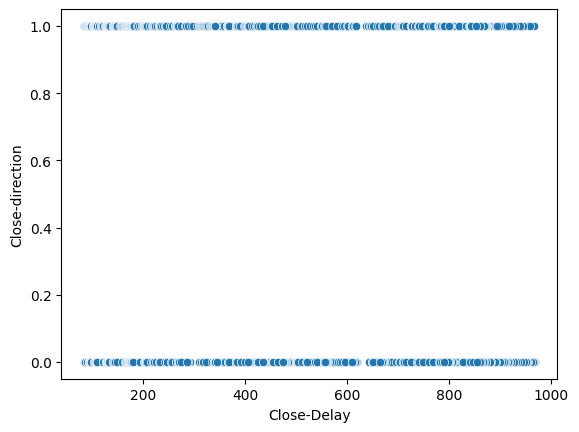

In [295]:
sns.scatterplot(x="Close-Delay",y="Close-direction",data=df)

In [296]:
df.to_csv("data_edited.csv")